## Line chart

In [1]:
import pandas as pd
import sqlite3

### Connection to sqlite3

In [2]:
conn = sqlite3.connect("data/checking-logs.sqlite")

In [3]:
pd.read_sql("PRAGMA table_info(pageviews);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


### Get the datetime

In [4]:
query = """
SELECT datetime, uid
FROM pageviews
WHERE uid LIKE 'user_%';
"""
df = pd.read_sql(query, conn)
df

,datetime,uid
0,2020-04-17 22:46:26.785035,user_30
1,2020-04-18 10:53:52.623447,user_14
2,2020-04-18 10:56:55.833899,user_17
3,2020-04-18 10:57:37.331258,user_14
4,2020-04-18 12:05:48.200144,user_17
...,...,...
982,2020-05-21 18:45:20.441142,user_28
983,2020-05-21 23:03:06.457819,user_19
984,2020-05-21 23:23:49.995349,user_25
985,2020-05-22 11:30:18.368990,user_5


In [5]:
df["datetime"] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df_group = df.groupby('date').size().reset_index(name='Views')
df_group

,date,Views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


### Graph

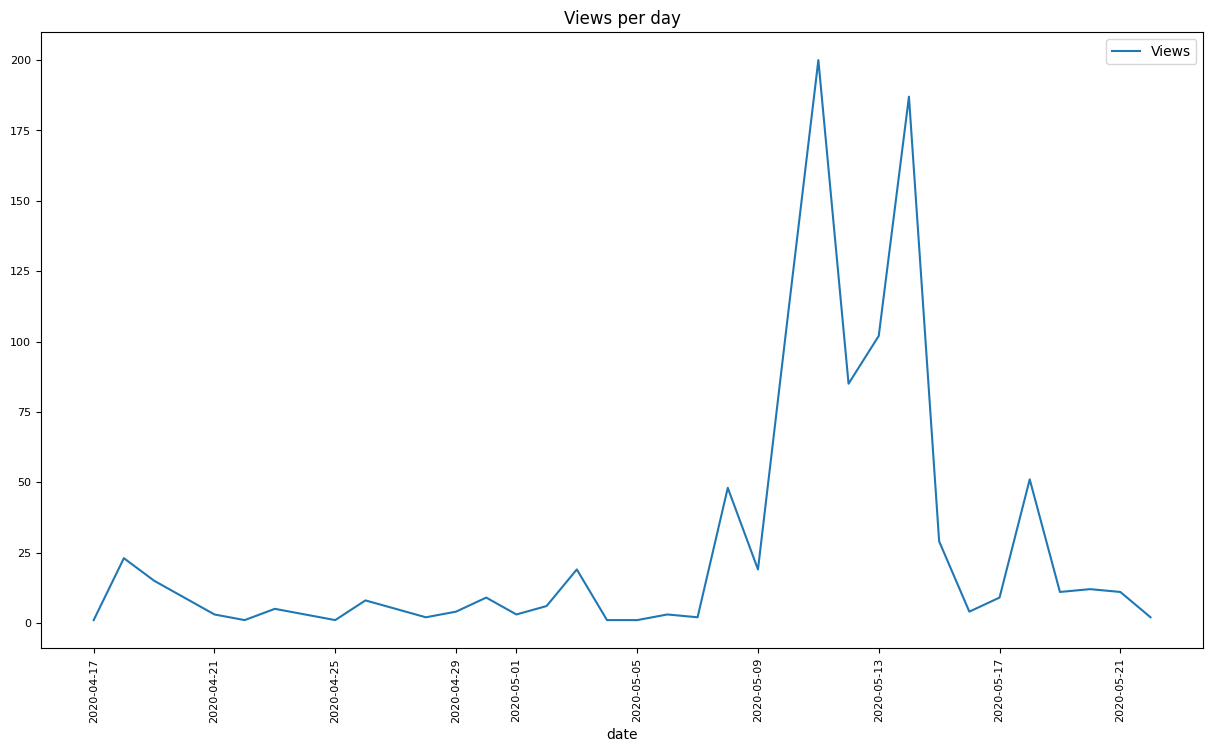

In [6]:
ax = df_group.plot(x='date', y='Views', kind='line', fontsize=8, figsize=(15,8), rot=90, title="Views per day")

### Connection closed

In [7]:
conn.close()